# 서울의 기온 데이터 분석

* https://data.kma.go.kr/stcs/grnd/grndTaList.do?pgmNo=70

* 기온분석>
    * 자료구분:일,
    * 자료형태:기본,
    * 기간: ~ 현재, 
    * 지역: 서울
* CSV 파일 형태로 다운

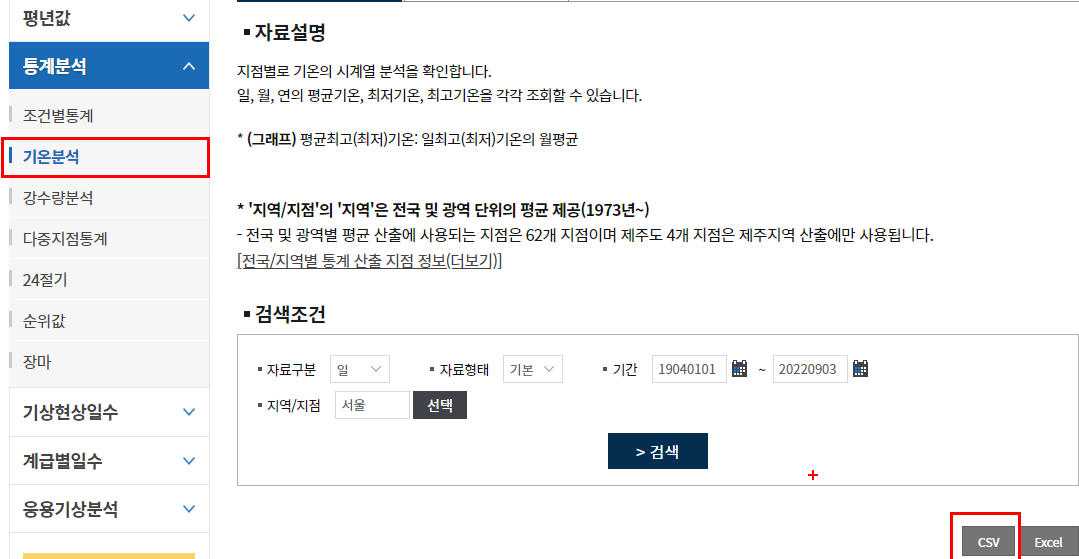

### 데이터에 대한 질문

* 서울이 가장 더웠던 날은 언제였을까? 얼마나 더웠을까?
* 일교차가 가장 큰 시기는 1년 중 언제쯤일까?
* 겨울에는 언제 가장 추울까? 12월? 1월? 2월?
* 가장 덥다고 알려진 대구보다 서울이 더 더운 날이 1년 중 얼마나 있을까?

## 라이브러리 로드

In [1]:
!pip install matplotlib

In [2]:
# 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# #코랩의 경우
# # 나눔고딕 폰트 인스톨
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

## 데이터 로드

In [4]:
# 데이터 로드, 인코딩, header,sep 등 필요한 파라미터 사용
df = pd.read_csv('./data/ta_20220920102259.csv')
df.head()

ParserError: Error tokenizing data. C error: Expected 1 fields in line 8, saw 5


In [8]:
# 데이터 로드, 인코딩, header,sep 등 필요한 파라미터 사용
df = pd.read_csv('./data/ta_20220920102259.csv', header=6) # 불러드릴 row위치 지정
df.head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,1907-10-01,108,13.5,7.9,20.7
1,1907-10-02,108,16.2,7.9,22.0
2,1907-10-03,108,16.2,13.1,21.3
3,1907-10-04,108,16.5,11.2,22.0
4,1907-10-05,108,17.6,10.9,25.4


> * 인코딩 에러 -> 편집기에서 인코딩(utf-8)로 명시적으로 지정 후, 저장해서 다시 판다스로 로드
> * Parse 에러(메모장사용시) -> 데이터의 윗부분의 텍스트를 로드할 때 해석하지 못하는 문자열이 있어서  에러발생-> header=6
> * UTF-8로 변환시 사용했던 편집기에 따라 상의한 결과-> header 숫자를 적절하게 조정

> * 보통 한글에서 사용하는 인코딩 종류(utf-8, euc-kr, cp949, utf-8-sig)

In [10]:
# 데이터 로드, 인코딩, header,sep 등 필요한 파라미터 사용
df = pd.read_csv('./data/ta_20220920102259.csv', header=6, encoding='euc-kr') # default: utf-8,
df.head()

UnicodeDecodeError: 'euc_kr' codec can't decode byte 0x98 in position 4: illegal multibyte sequence

## 데이터 살펴보기

* 데이터 사이즈 (행수, 컬럼수)
* 컬럼 이름과 타입
* 결측치 유무
* 통계정보

In [11]:
df.head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,1907-10-01,108,13.5,7.9,20.7
1,1907-10-02,108,16.2,7.9,22.0
2,1907-10-03,108,16.2,13.1,21.3
3,1907-10-04,108,16.5,11.2,22.0
4,1907-10-05,108,17.6,10.9,25.4


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41562 entries, 0 to 41561
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   날짜       41562 non-null  object 
 1   지점       41562 non-null  int64  
 2   평균기온(℃)  40806 non-null  float64
 3   최저기온(℃)  40803 non-null  float64
 4   최고기온(℃)  40803 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.6+ MB


> * 데이터수: 41562건
> * 컬럼수와 이름: 5개
> * 컬럼 타임: 날짜-> str, 기온: 실수
> * 결측치 유무: 기온 컬럼에 대해서는 결측치 존재 -> 어떻게?

In [13]:
df.describe() # 숫자형 컬럼에만 국한

,지점,평균기온(℃),최저기온(℃),최고기온(℃)
count,41562.0,40806.000000,40803.000000,40803.000000
mean,108.0,11.781135,7.490523,16.784746
std,0.0,10.662868,10.891121,10.980128
min,108.0,-19.200000,-23.100000,-16.300000
25%,108.0,2.725000,-1.400000,7.300000
50%,108.0,13.000000,8.000000,18.600000
75%,108.0,21.200000,17.200000,26.300000
max,108.0,33.700000,30.300000,39.600000


## 결측 데이터 전처리

### 결측데이터수 파악하기

In [14]:
df.isnull().sum()

날짜           0
지점           0
평균기온(℃)    756
최저기온(℃)    759
최고기온(℃)    759
dtype: int64

### 평균기온, 최저기온, 최고 기온 결측치인 날짜 찾음

In [18]:
df['평균기온(℃)'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
41557    False
41558    False
41559    False
41560    False
41561    False
Name: 평균기온(℃), Length: 41562, dtype: bool

In [19]:
# 평균기온, 최저기온, 최고 기온의 결측치인 날짜 찾음
df[df['평균기온(℃)'].isnull()]

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
15676,1950-09-01,108,NaN,NaN,NaN
15677,1950-09-02,108,NaN,NaN,NaN
15678,1950-09-03,108,NaN,NaN,NaN
15679,1950-09-04,108,NaN,NaN,NaN
15680,1950-09-05,108,NaN,NaN,NaN
...,...,...,...,...,...
16427,1953-11-26,108,NaN,NaN,NaN
16428,1953-11-27,108,NaN,NaN,NaN
16429,1953-11-28,108,NaN,NaN,NaN
16430,1953-11-29,108,NaN,NaN,NaN


> * 1950년대에는 전쟁중이어서 관측 불가

In [20]:

df[df['최저기온(℃)'].isnull()]

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
15676,1950-09-01,108,NaN,NaN,NaN
15677,1950-09-02,108,NaN,NaN,NaN
15678,1950-09-03,108,NaN,NaN,NaN
15679,1950-09-04,108,NaN,NaN,NaN
15680,1950-09-05,108,NaN,NaN,NaN
...,...,...,...,...,...
16430,1953-11-29,108,NaN,NaN,NaN
16431,1953-11-30,108,NaN,NaN,NaN
21260,1967-02-19,108,-1.7,NaN,NaN
23691,1973-10-16,108,12.3,NaN,NaN


In [21]:
# 2017년에도 결측치 있네...
df[df['최고기온(℃)'].isnull()]

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
15676,1950-09-01,108,NaN,NaN,NaN
15677,1950-09-02,108,NaN,NaN,NaN
15678,1950-09-03,108,NaN,NaN,NaN
15679,1950-09-04,108,NaN,NaN,NaN
15680,1950-09-05,108,NaN,NaN,NaN
...,...,...,...,...,...
16430,1953-11-29,108,NaN,NaN,NaN
16431,1953-11-30,108,NaN,NaN,NaN
21260,1967-02-19,108,-1.7,NaN,NaN
23691,1973-10-16,108,12.3,NaN,NaN


### 결측치 데이터 처리
* 분석 목적과 도메인의 영향이 큼


In [22]:
# 평균기온은 0, 최저기온은 999, 최고기온은 -999로 채움

df['평균기온(℃)'] = df['평균기온(℃)'].fillna(0)
df['최저기온(℃)'] = df['최저기온(℃)'].fillna(999)
df['최고기온(℃)'] = df['최고기온(℃)'].fillna(-999)


In [23]:
df.head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,1907-10-01,108,13.5,7.9,20.7
1,1907-10-02,108,16.2,7.9,22.0
2,1907-10-03,108,16.2,13.1,21.3
3,1907-10-04,108,16.5,11.2,22.0
4,1907-10-05,108,17.6,10.9,25.4


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41562 entries, 0 to 41561
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   날짜       41562 non-null  object 
 1   지점       41562 non-null  int64  
 2   평균기온(℃)  41562 non-null  float64
 3   최저기온(℃)  41562 non-null  float64
 4   최고기온(℃)  41562 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.6+ MB


In [25]:
df['날짜'].str.contains('1950')

0        False
1        False
2        False
3        False
4        False
         ...  
41557    False
41558    False
41559    False
41560    False
41561    False
Name: 날짜, Length: 41562, dtype: bool

In [26]:
#결측치였던 1950년대 데이터가 어떻게 바뀌었는지 확인
df[ df['날짜'].str.contains('1950') ]

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
15433,1950-01-01,108,2.8,0.7,4.5
15434,1950-01-02,108,-0.1,-3.8,2.4
15435,1950-01-03,108,-4.6,-7.3,-0.7
15436,1950-01-04,108,-7.7,-11.2,-4.2
15437,1950-01-05,108,-7.0,-11.6,-3.1
...,...,...,...,...,...
15727,1950-10-27,108,0.0,999.0,-999.0
15728,1950-10-28,108,0.0,999.0,-999.0
15729,1950-10-29,108,0.0,999.0,-999.0
15730,1950-10-30,108,0.0,999.0,-999.0


In [27]:
df[(df['최저기온(℃)']==-999)| (df['최고기온(℃)']==999) | (df['평균기온(℃)']==0)]

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
165,1908-03-14,108,0.0,-5.2,6.7
410,1908-11-14,108,0.0,-2.9,3.4
523,1909-03-07,108,0.0,-5.0,6.4
1142,1910-11-16,108,0.0,-4.2,6.7
1962,1913-02-13,108,0.0,-4.0,4.6
...,...,...,...,...,...
38343,2013-11-27,108,0.0,-4.3,4.7
39155,2016-02-17,108,0.0,-5.2,5.4
40177,2018-12-05,108,0.0,-4.3,3.4
40188,2018-12-16,108,0.0,-2.6,2.1


## 컬럼명 바꾸기

In [28]:
df.columns

Index(['날짜', '지점', '평균기온(℃)', '최저기온(℃)', '최고기온(℃)'], dtype='object')

In [29]:
df.rename(columns={df.columns[2]:'평균기온',
                   df.columns[3]:'최저기온', 
                   df.columns[4]:'최고기온'}, inplace=True)

In [30]:
df.head()

,날짜,지점,평균기온,최저기온,최고기온
0,1907-10-01,108,13.5,7.9,20.7
1,1907-10-02,108,16.2,7.9,22.0
2,1907-10-03,108,16.2,13.1,21.3
3,1907-10-04,108,16.5,11.2,22.0
4,1907-10-05,108,17.6,10.9,25.4


## 서울에서 가장 더웠던 날은?

In [32]:
#최고 더운 날은?
df.sort_values(by=['최고기온'],ascending=False)

,날짜,지점,평균기온,최저기온,최고기온
40051,2018-08-01,108,33.6,27.8,39.6
31277,1994-07-24,108,33.1,28.1,38.4
40050,2018-07-31,108,32.6,27.8,38.3
13111,1943-08-24,108,29.0,23.2,38.2
31276,1994-07-23,108,32.6,28.0,38.2
...,...,...,...,...,...
16069,1952-12-03,108,0.0,999.0,-999.0
15869,1952-04-16,108,0.0,999.0,-999.0
15909,1952-05-26,108,0.0,999.0,-999.0
16070,1952-12-04,108,0.0,999.0,-999.0


In [33]:
# 서울에서 가장 더웠던 날은? 2018-08-01: 39.6도 출력
df_temp = df.sort_values(by=['최고기온'], ascending=False)
df_temp.iloc[:1,[0,4]]

,날짜,최고기온
40051,2018-08-01,39.6


In [37]:
df.sort_values(by=['최고기온'],ascending=False,).head(1)

,날짜,지점,평균기온,최저기온,최고기온
40051,2018-08-01,108,33.6,27.8,39.6


In [40]:
df[['날짜','최고기온']].max() # 날짜의 최고, 최고기온의 최고를 추출하는 것임.

날짜      2022-09-19
최고기온          39.6
dtype: object

In [41]:
df[df['최고기온']==df['최고기온'].max()]

,날짜,지점,평균기온,최저기온,최고기온
40051,2018-08-01,108,33.6,27.8,39.6


In [42]:
df.loc[40051,'날짜']

'2018-08-01'

In [44]:
# 서울에서 가장 더웠던 날은? 2018-08-01: 39.6도 출력
df_date = df.loc[40051,"날짜"]
df_deg = df.loc[40051,"최고기온"]

print("서울에서 가장 더웠던 날은? {0}: {1} 도".format(df_date,df_deg))

서울에서 가장 더웠던 날은? 2018-08-01: 39.6 도


# 내 생일날 기온변화 그래프 그리기

## 내 생일날 기온변화 그래프 그리기(평균기온 기준)
* 데이터 로딩
* 결측 데이터 전처리
* 내 생일 데이터만 추출
* 필요한 컬럼만 추출 or 불필요한 데이터 삭제
* 그래프 그리기

In [54]:
#라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 로딩
df = pd.read_csv('./data/ta_20220920102259.csv', header=6) # 불러드릴 row위치 지정
df.head()

# 결측치 처리
df['평균기온(℃)'] = df['평균기온(℃)'].fillna(0)
df['최저기온(℃)'] = df['최저기온(℃)'].fillna(999)
df['최고기온(℃)'] = df['최고기온(℃)'].fillna(-999)

# 데이터 전처리(컬럼명 수정)
df.rename(columns={df.columns[2]:'평균기온',
                   df.columns[3]:'최저기온', 
                   df.columns[4]:'최고기온'}, inplace=True)


In [55]:
df.head()

,날짜,지점,평균기온,최저기온,최고기온
0,1907-10-01,108,13.5,7.9,20.7
1,1907-10-02,108,16.2,7.9,22.0
2,1907-10-03,108,16.2,13.1,21.3
3,1907-10-04,108,16.5,11.2,22.0
4,1907-10-05,108,17.6,10.9,25.4


## 내 생일 데이터만 추출

In [56]:
# 어떤 컬럼을 기준으로 내생일 기온그래프를 그릴껀지 고민
# 내 생일 데이터만 추출 (06-14)

df['날짜'].str.contains('06-14')

0        False
1        False
2        False
3        False
4        False
         ...  
41557    False
41558    False
41559    False
41560    False
41561    False
Name: 날짜, Length: 41562, dtype: bool

In [57]:
birth_df = df[df['날짜'].str.contains('06-14')]

In [50]:
birth_df.head()

,날짜,지점,평균기온,최저기온,최고기온
257,1908-06-14,108,21.2,17.0,27.6
622,1909-06-14,108,19.6,15.8,26.0
987,1910-06-14,108,20.2,14.9,26.1
1352,1911-06-14,108,22.5,14.4,29.3
1718,1912-06-14,108,23.2,17.3,29.0


## 필요한 컬럼만 추출

In [58]:
# 필요한 컬럼만 추출 (날짜, 평균기온)

birth_df = birth_df[['날짜','평균기온']]


In [59]:
birth_df.head()

,날짜,평균기온
257,1908-06-14,21.2
622,1909-06-14,19.6
987,1910-06-14,20.2
1352,1911-06-14,22.5
1718,1912-06-14,23.2


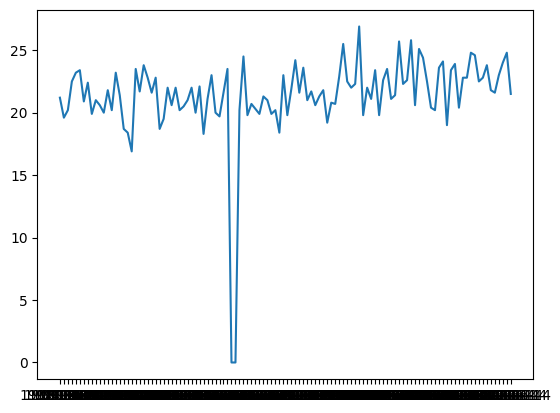

In [60]:
# 내 생일 데이터 그래프 그리기
import matplotlib.pyplot as plt

plt.plot(birth_df['날짜'],birth_df['평균기온'])


> * 6월달 평균기온이 0도 라고?

In [61]:
birth_df['평균기온'] < 5

257      False
622      False
987      False
1352     False
1718     False
         ...  
40003    False
40368    False
40734    False
41099    False
41464    False
Name: 평균기온, Length: 114, dtype: bool

In [63]:
birth_df[birth_df['평균기온'] < 5 ]

,날짜,평균기온
15928,1952-06-14,0.0
16262,1953-06-14,0.0


> * 결측치를 잘 못 처리한 것 같습니다. 0도로 일괄 처리한 부분이 문제로 보임. -> 전처리 실패

## 결측 데이터 재 처리

> * 평균 기온이 0인 데이터 어떻게 처리 할 것인가?
> * 결측치를 삭제하는 것으로 처리

In [64]:
#라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 로딩
df = pd.read_csv('./data/ta_20220920102259.csv', header=6) # 불러드릴 row위치 지정
df.head()

# 데이터 전처리(컬럼명 수정)
df.rename(columns={df.columns[2]:'평균기온',
                   df.columns[3]:'최저기온', 
                   df.columns[4]:'최고기온'}, inplace=True)

In [65]:
# 결측 데이터 삭제
df.dropna(inplace=True)

In [66]:
df.isnull().sum()

날짜      0
지점      0
평균기온    0
최저기온    0
최고기온    0
dtype: int64

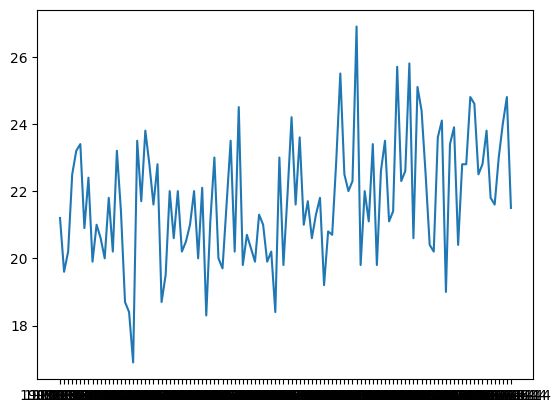

In [67]:
birth_df = df[df['날짜'].str.contains('06-14')]
birth_df = birth_df[['날짜','평균기온']]
plt.plot(birth_df['날짜'],birth_df['평균기온'])

## 내가 태어난 이 후의 데이터만 추출해서 살펴보기

In [68]:
df['날짜'].str.contains('06-14')

0        False
1        False
2        False
3        False
4        False
         ...  
41557    False
41558    False
41559    False
41560    False
41561    False
Name: 날짜, Length: 40802, dtype: bool

In [69]:
df['날짜'] >= '1980-06-14'

0        False
1        False
2        False
3        False
4        False
         ...  
41557     True
41558     True
41559     True
41560     True
41561     True
Name: 날짜, Length: 40802, dtype: bool

In [71]:
# 내 생일이면서(06-14), 1980년 이후의 데이터만 추출

birth_df = df[ (df['날짜'].str.contains('06-14'))   &  ( df['날짜'] >= '1980-06-14' )]
birth_df.head()

,날짜,지점,평균기온,최저기온,최고기온
26124,1980-06-14,108,25.5,19.1,31.6
26489,1981-06-14,108,22.5,16.9,27.8
26854,1982-06-14,108,22.0,16.7,27.6
27219,1983-06-14,108,22.3,17.3,29.6
27585,1984-06-14,108,26.9,21.1,31.9


In [72]:
# 필요한 컬럼만 추출

birth_df = birth_df[['날짜','평균기온']]

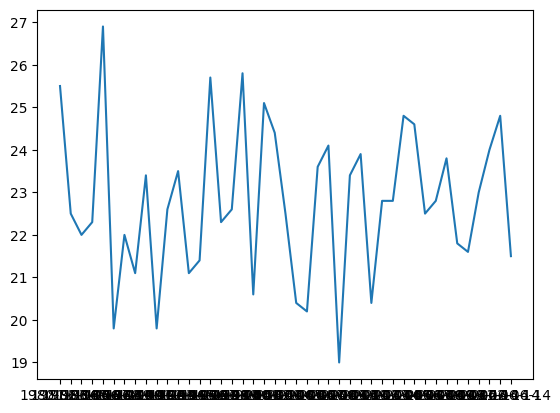

In [73]:
# 내 생일 데이터 그래프 그리기
plt.plot(birth_df['날짜'],birth_df['평균기온'])

Text(0, 1, 'average temperature (℃)')

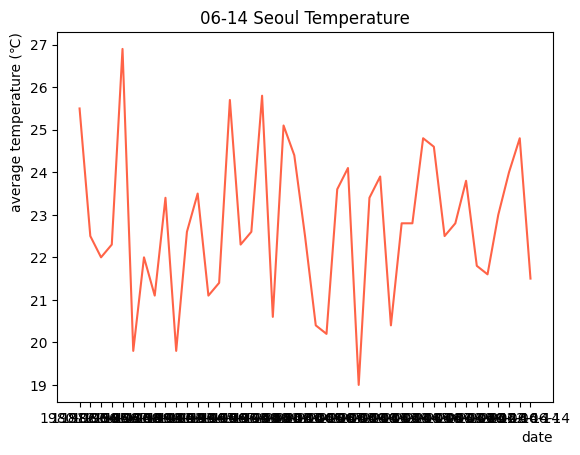

In [74]:
plt.plot(birth_df['날짜'],birth_df['평균기온'], color='tomato')
plt.title('06-14 Seoul Temperature')
plt.xlabel('date', loc='right')
plt.ylabel('average temperature (℃)', loc='top')

## 내가 태어난 날 -> 날짜 형식으로 변환하고 데이터 추출하고 보기

### 날짜 컬럼 Dtype 확인

In [75]:
# 날짜 컬럼 타입 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40802 entries, 0 to 41561
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      40802 non-null  object 
 1   지점      40802 non-null  int64  
 2   평균기온    40802 non-null  float64
 3   최저기온    40802 non-null  float64
 4   최고기온    40802 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.9+ MB


### object -> datetime64[ns] 형변환

In [76]:
# 날짜 데이터 Str => date 형으로 변환
df['날짜'] = df['날짜'].astype('datetime64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40802 entries, 0 to 41561
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      40802 non-null  datetime64[ns]
 1   지점      40802 non-null  int64         
 2   평균기온    40802 non-null  float64       
 3   최저기온    40802 non-null  float64       
 4   최고기온    40802 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 1.9 MB


In [77]:
df.head()

,날짜,지점,평균기온,최저기온,최고기온
0,1907-10-01,108,13.5,7.9,20.7
1,1907-10-02,108,16.2,7.9,22.0
2,1907-10-03,108,16.2,13.1,21.3
3,1907-10-04,108,16.5,11.2,22.0
4,1907-10-05,108,17.6,10.9,25.4


In [78]:
df['날짜'].dt.year

0        1907
1        1907
2        1907
3        1907
4        1907
         ... 
41557    2022
41558    2022
41559    2022
41560    2022
41561    2022
Name: 날짜, Length: 40802, dtype: int64

In [79]:
df['날짜'].dt.month

0        10
1        10
2        10
3        10
4        10
         ..
41557     9
41558     9
41559     9
41560     9
41561     9
Name: 날짜, Length: 40802, dtype: int64

In [80]:
df['날짜'].dt.day

0         1
1         2
2         3
3         4
4         5
         ..
41557    15
41558    16
41559    17
41560    18
41561    19
Name: 날짜, Length: 40802, dtype: int64

In [81]:
df.head()

,날짜,지점,평균기온,최저기온,최고기온
0,1907-10-01,108,13.5,7.9,20.7
1,1907-10-02,108,16.2,7.9,22.0
2,1907-10-03,108,16.2,13.1,21.3
3,1907-10-04,108,16.5,11.2,22.0
4,1907-10-05,108,17.6,10.9,25.4


In [83]:
df['년'] = df['날짜'].dt.year
df['월'] = df['날짜'].dt.month
df['일'] = df['날짜'].dt.day

In [84]:
df.head()

,날짜,지점,평균기온,최저기온,최고기온,년,월,일
0,1907-10-01,108,13.5,7.9,20.7,1907,10,1
1,1907-10-02,108,16.2,7.9,22.0,1907,10,2
2,1907-10-03,108,16.2,13.1,21.3,1907,10,3
3,1907-10-04,108,16.5,11.2,22.0,1907,10,4
4,1907-10-05,108,17.6,10.9,25.4,1907,10,5


### 내 생일이면서 1980년 이후의 데이터만 추출

In [86]:
df['년'] >= 1980

0        False
1        False
2        False
3        False
4        False
         ...  
41557     True
41558     True
41559     True
41560     True
41561     True
Name: 년, Length: 40802, dtype: bool

In [87]:
df[df['년'] >= 1980]

,날짜,지점,평균기온,최저기온,최고기온,년,월,일
25959,1980-01-01,108,3.8,0.5,6.6,1980,1,1
25960,1980-01-02,108,4.7,3.5,5.9,1980,1,2
25961,1980-01-03,108,3.8,-0.5,6.2,1980,1,3
25962,1980-01-04,108,-3.2,-6.9,-0.5,1980,1,4
25963,1980-01-05,108,-5.3,-9.1,-1.0,1980,1,5
...,...,...,...,...,...,...,...,...
41557,2022-09-15,108,25.2,22.0,28.3,2022,9,15
41558,2022-09-16,108,25.7,23.4,29.9,2022,9,16
41559,2022-09-17,108,25.6,23.3,29.4,2022,9,17
41560,2022-09-18,108,27.1,23.0,32.5,2022,9,18


In [88]:
df['월'] == 6

0        False
1        False
2        False
3        False
4        False
         ...  
41557    False
41558    False
41559    False
41560    False
41561    False
Name: 월, Length: 40802, dtype: bool

In [89]:
(df['년'] >= 1980) & (df['월'] == 6) & (df['일'] ==14)

0        False
1        False
2        False
3        False
4        False
         ...  
41557    False
41558    False
41559    False
41560    False
41561    False
Length: 40802, dtype: bool

In [91]:
# 내 생일이면서(06-14), 1980년 이후의 데이터만 추출
birth_df = df[(df['년'] >= 1980) & (df['월'] == 6) & (df['일'] ==14)]
birth_df = birth_df[['년', '평균기온']]

In [92]:
# 필요한 컬럼만 추출

birth_df.head()

,년,평균기온
26124,1980,25.5
26489,1981,22.5
26854,1982,22.0
27219,1983,22.3
27585,1984,26.9


## 그래프 그리기

In [95]:
!pip show matplotlib

Name: matplotlib
Version: 3.6.0
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: matplotlib-users@python.org
License: PSF
Location: c:\python39\lib\site-packages
Requires: contourpy, cycler, fonttools, kiwisolver, numpy, packaging, pillow, pyparsing, python-dateutil
Required-by: 


In [96]:
!pip install -U matplotlib

Text(0, 0.5, 'average temperature (℃)')

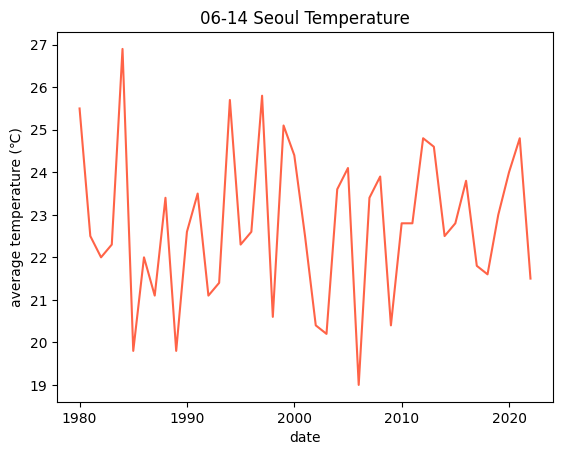

In [94]:
# 내 생일 데이터 그래프 그리기
plt.plot(birth_df['년'],birth_df['평균기온'], color='tomato')

plt.title('06-14 Seoul Temperature')
plt.xlabel('date', loc='right')
# plt.xlabel('date')
plt.ylabel('average temperature (℃)')

# 매년 크리스마스의 최고 기온과 최저 기온의 추이를 그려보자. 

# 같은 데이타, 다른 그래프, 새로운 분석
* 서울 최고 기온 데이터 전체를 나타낸 lineplot을 보고 어떤 정보를 얻었나요?

##  line:서울 최고 기온 그래프

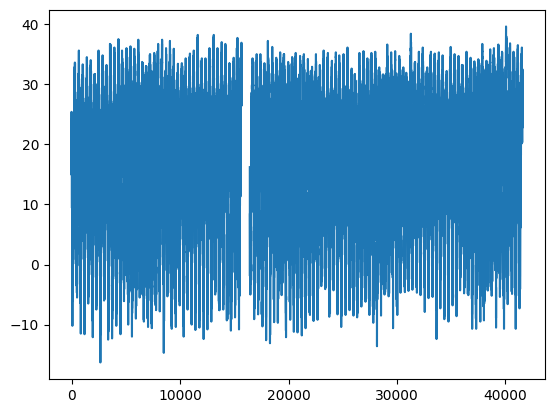

In [97]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./data/ta_20220920102259.csv',header=6)
df.rename(columns={
    df.columns[2]: '평균기온',
    df.columns[3]: '최저기온',
    df.columns[4]: '최고기온'
},inplace=True)

plt.plot(df['최고기온'])
plt.show()

> * 최고 기온 데이터 전체를 그래프로 나타냈는데, 결측치 존재 말고는 특별한 정보를 얻을 수 없습니다. 
> * 다른 관점으로 데이터를 바라보기 위해서
> * 다른 종류의 시각화를 시도해 봅시다. 

## hist:기온 데이터를 히스토그램으로 표현하기

* 특정구간의 자료의 수를 표현할때

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('./data/ta_20220920102259.csv',header=6)
df.rename(columns={
    df.columns[2]: '평균기온',
    df.columns[3]: '최저기온',
    df.columns[4]: '최고기온'
},inplace=True)



(array([  35.,  596., 2812., 5465., 5275., 4915., 6248., 9004., 5915.,
         538.]),
 array([-16.3 , -10.71,  -5.12,   0.47,   6.06,  11.65,  17.24,  22.83,
         28.42,  34.01,  39.6 ]),
 <BarContainer object of 10 artists>)

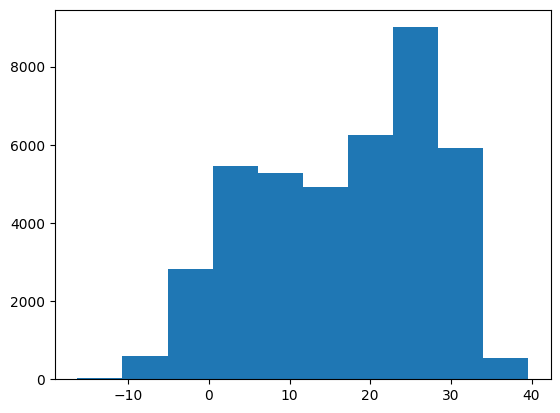

In [99]:
plt.hist(df['최고기온']) #hist() 컬럼 한개 지정

<AxesSubplot: >

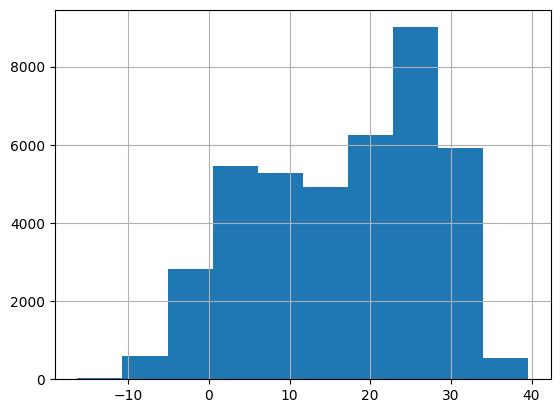

In [100]:
# pandas 내부의 매플랏립 라이브러리와 연동

df['최고기온'].hist()


<AxesSubplot: >

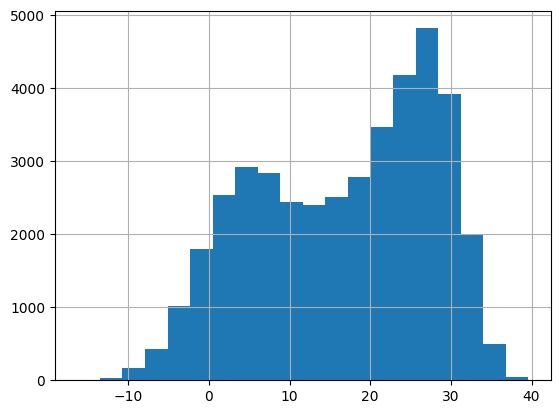

In [101]:
df['최고기온'].hist(bins=20) #20구간으로 나눠서 시각화

<AxesSubplot: >

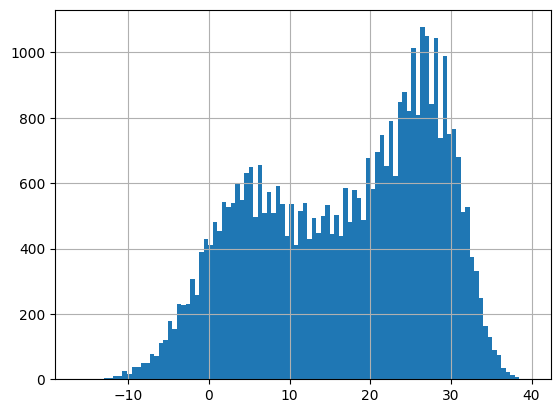

In [106]:
df['최고기온'].hist(bins=100)

> * 낙타 등 처럼 보입니다. 
> * 겨울과 여름 계절의 패턴이 이렇게 나타난걸까요?
> * 한 계절만 따로 추출해봐야지~~~

## hist:겨울과 여름 계절의 패턴인가? 그럼 8월만 데이터를 뽑아보자.
* 역대 8월의 최고 온도는?
* 최고 기온의 분포(최저 ~ 최고)는?

In [107]:
df.head()

,날짜,지점,평균기온,최저기온,최고기온
0,1907-10-01,108,13.5,7.9,20.7
1,1907-10-02,108,16.2,7.9,22.0
2,1907-10-03,108,16.2,13.1,21.3
3,1907-10-04,108,16.5,11.2,22.0
4,1907-10-05,108,17.6,10.9,25.4


In [108]:
# 결측치 삭제
df.dropna(inplace=True)

# 날짜 타입으로 변환
df['날짜'] = df['날짜'].astype('datetime64')




 

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40802 entries, 0 to 41561
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      40802 non-null  datetime64[ns]
 1   지점      40802 non-null  int64         
 2   평균기온    40802 non-null  float64       
 3   최저기온    40802 non-null  float64       
 4   최고기온    40802 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 1.9 MB


In [111]:
#8월만 데이터 추출

df[df['날짜'].dt.month == 8]

,날짜,지점,평균기온,최저기온,최고기온
305,1908-08-01,108,26.2,24.4,29.6
306,1908-08-02,108,26.4,23.3,30.7
307,1908-08-03,108,26.9,24.2,32.0
308,1908-08-04,108,26.3,22.6,31.5
309,1908-08-05,108,27.3,23.6,32.4
...,...,...,...,...,...
41538,2022-08-27,108,21.5,17.6,25.5
41539,2022-08-28,108,22.6,16.1,28.4
41540,2022-08-29,108,21.0,19.5,22.5
41541,2022-08-30,108,19.1,17.9,20.3


In [112]:
aug_df = df[df['날짜'].dt.month == 8]

In [113]:
aug_df.head()

,날짜,지점,평균기온,최저기온,최고기온
305,1908-08-01,108,26.2,24.4,29.6
306,1908-08-02,108,26.4,23.3,30.7
307,1908-08-03,108,26.9,24.2,32.0
308,1908-08-04,108,26.3,22.6,31.5
309,1908-08-05,108,27.3,23.6,32.4


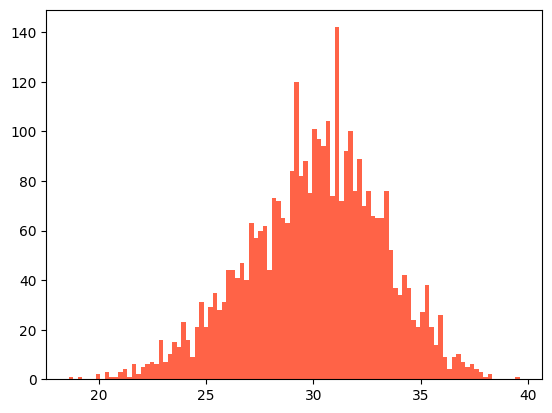

In [117]:
# hist(데이터,몇개구간,색깔)

plt.hist(aug_df['최고기온'],bins=100,color='tomato')
plt.show()


## hist:1월과 8월의 데이터를 히스토그램으로 시각화하기


In [118]:

# 8월 데이터만 추출
aug_df = df[df['날짜'].dt.month == 8]

# 1월 데이터만 추출
jan_df = df[df['날짜'].dt.month == 1]


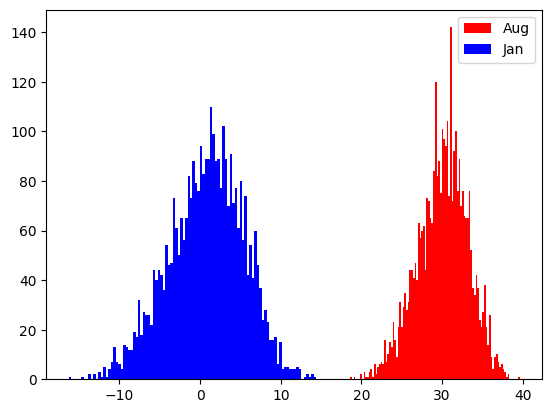

In [122]:
plt.hist(aug_df['최고기온'],bins=100,color='r',label='Aug')
plt.hist(jan_df['최고기온'],bins=100,color='b',label='Jan')
plt.legend() #범례표시
plt.show()

> * 같은 데이터에서 어떤 내용을 추출하여, 어떤 방법으로 시각화하는냐에 따라 새로운 정보를 발견할 수 있습니다. 
> * 1,8월 이외에 궁금한 달이 있다면 도전!

## box:기온 데이터 대략적인 통계정보 확인하기

In [123]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./data/ta_20220920102259.csv',header=6)
df.rename(columns={
    df.columns[2]: '평균기온',
    df.columns[3]: '최저기온',
    df.columns[4]: '최고기온'
},inplace=True)


# 결측 데이터 삭제
df.dropna(inplace=True)


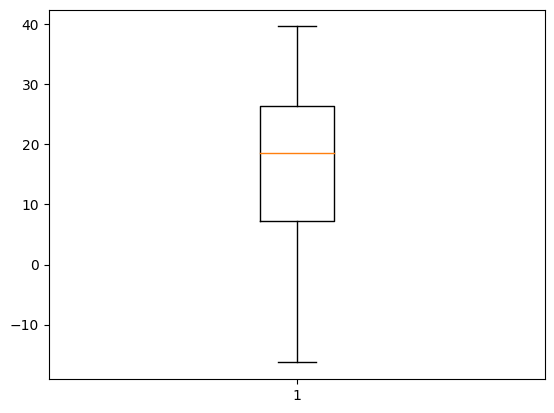

In [124]:
plt.boxplot(df['최고기온'])
plt.show()

In [125]:
df['최고기온'].describe()

count    40802.000000
mean        16.784462
std         10.980112
min        -16.300000
25%          7.300000
50%         18.600000
75%         26.300000
max         39.600000
Name: 최고기온, dtype: float64

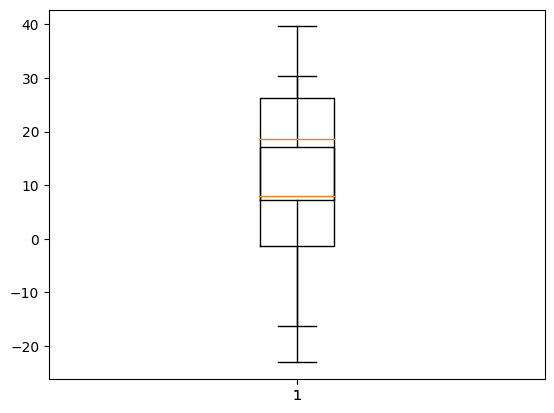

In [126]:
plt.boxplot(df['최고기온'])
plt.boxplot(df['최저기온'])
plt.show()

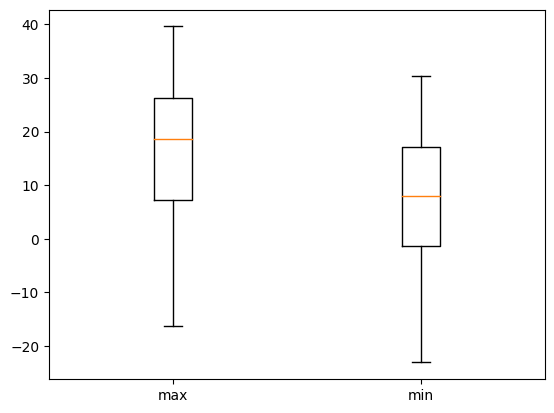

In [129]:
plt.boxplot([    df['최고기온'] , df['최저기온']    ], labels=['max','min'])
plt.show()

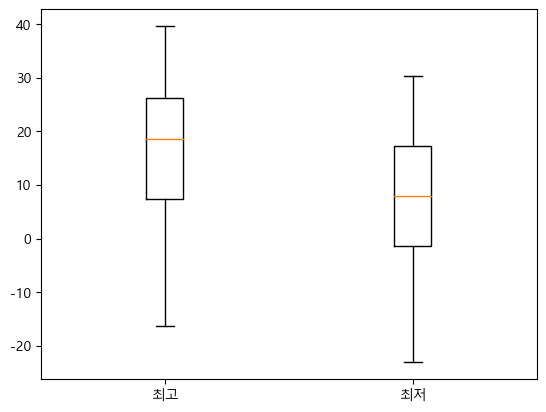

In [130]:
# 한글사용시 설정
plt.rc('font',family='Malgun Gothic')      #윈도우, 코랩
# plt.rc('font', family='AppleGothic')     #맥
plt.rcParams['axes.unicode_minus']=False   #마이너스 기호 깨짐 방지

plt.boxplot([    df['최고기온'] , df['최저기온']    ], labels=['최고','최저'])
plt.show()

## 월별 기온 데이터

1. 데이터를 월별로 조회하고, 결과를 리스트에 담는다.
2. 월별 데이터를 box plot으로 그래프 그린다. (평균기온)

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('./data/ta_20210103160419.csv',header=7)
df.rename(columns={
    df.columns[2]: '평균기온',
    df.columns[3]: '최저기온',
    df.columns[4]: '최고기온'
},inplace=True)

# 결측 데이터 삭제
df.dropna(inplace=True)
# 날짜 데이터 Str => date 형으로 변환
df['날짜'] = df['날짜'].astype('datetime64')